# Injecting signals into TESS light curves.

In [1]:
from astropy.io import fits
import numpy as np
import os
import matplotlib.pyplot as plt
import eleanor
from tqdm import tnrange, trange
from tess_rotation import *

from scipy.interpolate import RectBivariateSpline

In [9]:
# This is the directory where MAST stores the prf FITS files.
path = "https://archive.stsci.edu/missions/tess/models/prf_fitsfiles/"

In [10]:
prf = getPrfAtColRowFits(939.361, 1095.571, 1, 4, 1, path)  # col, row, ccd, camera, sector

In [11]:
# shifted_prf2 = move_prf(prf, 0.0, -2.49)
# shifted_prf1 = move_prf(prf, 0.0, 2.51)
# plt.imshow(shifted_prf2, origin='lower')

In [15]:
# plt.imshow(shifted_prf2 - shifted_prf1, origin='lower')
# plt.colorbar()

In [16]:
postflux = fits.open("/Users/rangus/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc/" \
                     "hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc.fits")

In [18]:
postcard = postflux[2].data + 0.0
time = postflux[1].data['tstart']
print(np.shape(postcard), np.shape(time))

(1282, 104, 148) (1282,)


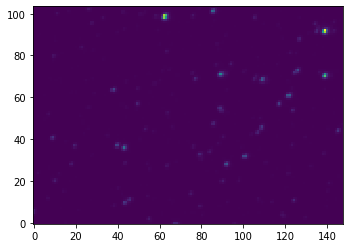

In [19]:
plt.imshow(postcard[0, :, :], origin='lower')

In [14]:
offset_y_1 = 0.5  # this should really be an array that tracks the row and column motions 
offset_x_1 = 0.7  # of the centroid of a star. You can calculate those yourself by taking a bright isolated star
                  # and calculating the center of mass at each cadence and dropping that in, or running eleanor and
                  # taking data.x_com (I think) would get you the same thing and you can drop in those offsets.

signal_1 = 300 + 56.0 * np.sin(time*2*np.pi/4.8)  # simple sine wave, you can change it to something more realistic

for i in trange(np.shape(postcard)[0]):
    postcard[i,63:76,33:46] += signal_1[i]*move_prf(prf, offset_x_1, offset_y_1)

100%|██████████| 1282/1282 [00:38<00:00, 33.21it/s]


In [ ]:
postflux[2].data = postcard + 0.0
postflux.close()